In [1]:
# Imports
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ejemplos clase

## Ejemplo 1 

Los datos en siguiente tabla son 55 tiempos de sonrisa, en segundos, de un bebé de ocho semanas:

|Datos|
|---|
|10.4 19.6 18.8 13.9	17.8 16.8 21.6 17.9 12.5 11.1 4.9 <br> 12.8 14.8 22.8 20.0	15.9 16.3 13.4 17.1	14.5 19.0 22.8 <br> 1.3 0.7	8.9 11.9 10.9 7.3 5.9 3.7 17.9 19.2 9.8 <br> 5.8	6.9	2.6	5.8	21.7 11.8 3.4 2.1 4.5 6.3 10.7 <br> 8.9 9.4	9.4	7.6	10.0 3.3 6.7 7.8 11.6 13.8 18.6|


In [107]:
t_risa = [10.4, 19.6, 18.8, 13.9, 17.8, 16.8, 21.6, 17.9, 12.5, 11.1, 4.9, 
               12.8, 14.8, 22.8, 20.0, 15.9, 16.3, 13.4, 17.1, 14.5, 19.0, 22.8, 
               1.3, 0.7, 8.9, 11.9, 10.9, 7.3, 5.9, 3.7, 17.9, 19.2, 9.8, 
               5.8, 6.9, 2.6, 5.8, 21.7, 11.8, 3.4, 2.1, 4.5, 6.3, 10.7, 
               8.9, 9.4, 9.4, 7.6, 10.0, 3.3, 6.7, 7.8, 11.6, 13.8, 18.6]
# Media
media = sum(t_risa)/len(t_risa)
print(t_risa)
print("Media: ", media)
desv_std = stats.tstd(t_risa)
print("Desviación estandar: ", desv_std)

[10.4, 19.6, 18.8, 13.9, 17.8, 16.8, 21.6, 17.9, 12.5, 11.1, 4.9, 12.8, 14.8, 22.8, 20.0, 15.9, 16.3, 13.4, 17.1, 14.5, 19.0, 22.8, 1.3, 0.7, 8.9, 11.9, 10.9, 7.3, 5.9, 3.7, 17.9, 19.2, 9.8, 5.8, 6.9, 2.6, 5.8, 21.7, 11.8, 3.4, 2.1, 4.5, 6.3, 10.7, 8.9, 9.4, 9.4, 7.6, 10.0, 3.3, 6.7, 7.8, 11.6, 13.8, 18.6]
Media:  11.65272727272727
Desviación estandar:  6.080748447642089


## Ejemplo 2

Si supondremos que los tiempos de sonrisa (del ejemplo anterior), en segundos, siguen una distribución uniforme entre 0 y 23 segundos, ambos inclusive. Esto significa que cualquier tiempo de sonrisa desde 0 hasta 23 segundos inclusive es igualmente probable. 
1. Defina la distribución uniforme en python.
2. Dibuje la PFM y la CDF asociada al problema.
3. ¿Cuál es la probabilidad de que un bebé de ocho semanas elegido al azar sonría entre dos y 18 segundos?
4. Halle la probabilidad de que un bebé de ocho semanas elegido al azar sonría más de 12 segundos **sabiendo** que el bebé sonríe **más de 8 segundos**.

**Solución punto 1**

Inicialmente definimos la variable aleatoria $X$ de la siguiente manera:
* $X$: la duración, en segundos, de la sonrisa de un bebé de ocho semanas.

Si $X \sim  U(a,b)$ donde $a$ es el menor valor de $x$ y $b$ el valor mayor de $x$, y asumiendo para este ejemplo $0 \leq x \leq 23$ que $𝑎=0$ y $𝑏=23$ por lo que $𝑋 \sim 𝑈(0,23)$ A continuación tenemos la declaración de la VA en python:

In [108]:
# X ~ U(a = 0, b = 23)
b = 23 
a = 0 
X = stats.uniform(loc=a, scale=b)

**Solución punto 2**

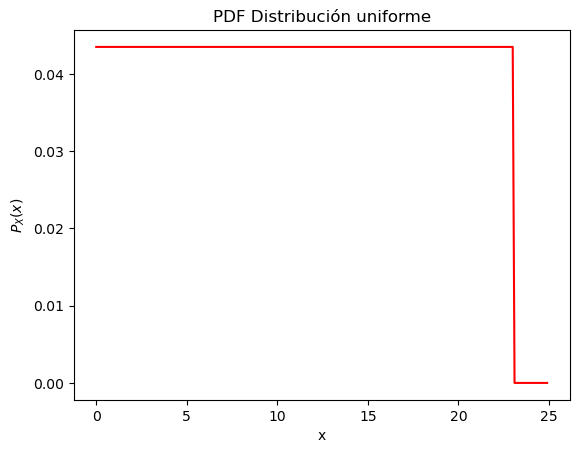

In [109]:
# Calculo de la grafica
x = np.arange(0,25,0.1) # Valores de x entre [0,30)
pdf_x = X.pdf(x)
# Grafica del a PDF
plt.title('PDF Distribución uniforme')
plt.ylabel('$P_X(x)$')
plt.xlabel('x')
plt.plot(x, pdf_x,color='r')
plt.show()

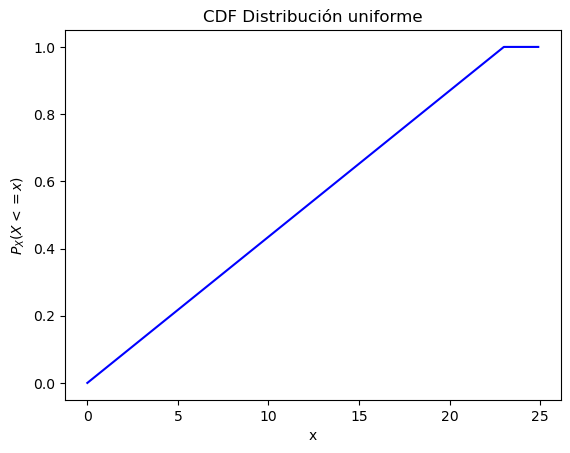

In [110]:
# Calculo de la CDF
cdf_x = X.cdf(x)
plt.title('CDF Distribución uniforme')
plt.ylabel('$P_X(X <= x)$')
plt.xlabel('x')
plt.plot(x, cdf_x,color='b')
plt.show()

**Solución punto 3**

En este caso nos preguntan por $P(2 \leq X \leq 18)$ la cual puede ser calculada de la siguiente forma:

$$P(2 \leq X \leq 18) = P(X \leq 18) - P(X \leq 2) = F(18) - F(2) $$

In [111]:
# P(2<=X<=18)
P1 = X.cdf(18) - X.cdf(2) # P(2<=X<=18) = F(18) - F(2)
print("P(2<=X<=18): " + str(P1))

P(2<=X<=18): 0.6956521739130435


La siguiente figura muestra graficamente lo anterior:

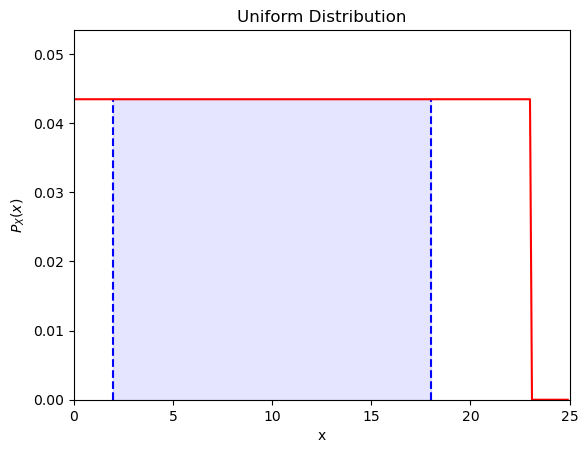

In [112]:
# Grafica
fig, ax = plt.subplots()
ax.set_xlim(0, 25)
ax.set_ylim(0, max(pdf_x) + 0.01)
# Limites
x_2 = plt.vlines(x = 2, ymin = 0,ymax = max(pdf_x), color = 'b', linestyles='--')
x_18 = plt.vlines(x = 18, ymin = 0,ymax = max(pdf_x), color = 'b', linestyles='--')
plt.title('Uniform Distribution')
plt.ylabel('$P_X(x)$')
plt.xlabel('x')
plt.plot(x, pdf_x,color='r')
ax.fill_between(x, pdf_x,0, where=(x>=2) & (x<=18), color='blue', alpha=.1)

plt.show()

**Solución punto 4**

En este caso, nos preguntan por: $P(X>12|X>8)$ lo cual en terminos de la cdf es:

$P(X>12|X>8) = \frac{P((X>12)and(X>8))}{P(X>8)} = \frac{P(X>12)}{P(X>8)} = \frac{1 - P(X \leq 12)}{1 - P(X \leq 8)}$

In [113]:
# P(X>12|X>8) = P(X>12)/P(X>8) = (1-P(X<12))/(1-P(X<8)) = (1-F(12))/(1-F(8))   
P2 = (1 - X.cdf(12))/(1 - X.cdf(8)) # (1-F(12))/(1-F(8))   
print("P(X>12|X>8): " + str(P2))

P(X>12|X>8): 0.7333333333333334


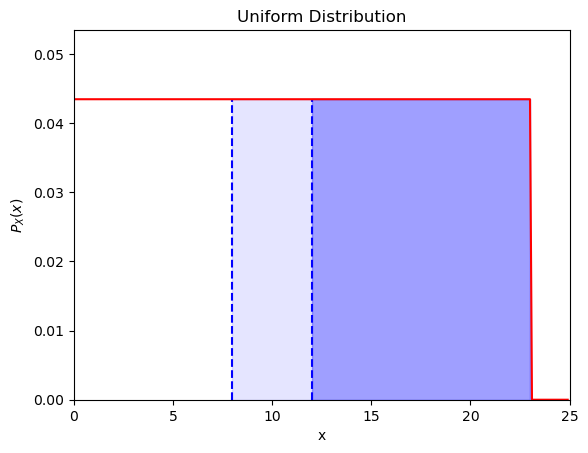

In [114]:
# Grafica
fig, ax = plt.subplots()
ax.set_xlim(0, 25)
ax.set_ylim(0, max(pdf_x) + 0.01)
# Limites
x_8 = plt.vlines(x = 8, ymin = 0,ymax = max(pdf_x), color = 'b', linestyles='--')
x_12 = plt.vlines(x = 12, ymin = 0,ymax = max(pdf_x), color = 'b', linestyles='--')
plt.title('Uniform Distribution')
plt.ylabel('$P_X(x)$')
plt.xlabel('x')
plt.plot(x, pdf_x,color='r')
ax.fill_between(x, pdf_x,0, where=(x>=8) & (x<=23), color='blue', alpha=.1)
ax.fill_between(x, pdf_x,0, where=(x>=12) & (x<=23), color='blue', alpha=.3)
plt.show()

## Ejemplo 3

La dirección de una imperfección con respecto a una línea de referencia sobre un objeto circular como un neumático, un rotor de freno o un volante está, en general, sujeta a incertidumbre. Considérese la línea de referencia que conecta el vástago de la válvula de un neumático con el punto central y sea 𝑋 el ángulo medido en el sentido de las manecillas del reloj con respecto a la ubicación de una imperfección.

**Definicion del problema**:
* $X$: Angulo en grados en el que se da la imperfección respecto a la valvula

X sigue una probabilidad uniforme entre 0 y 360:
* $X \sim U(a = 0, b = 360)$

In [116]:
# X ~ U(a = 0, b = 360)
a = 0
b = 360
X = stats.uniform(loc=a, scale=b)

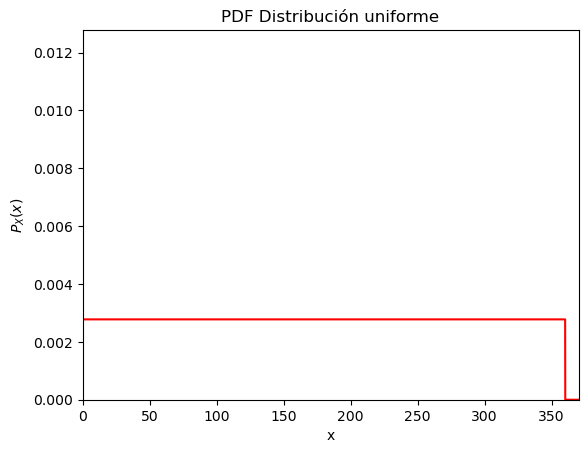

In [117]:
# Valores para graficar
x = np.arange(0,370,0.1) # Valores de x entre [0,370)
pdf_x = X.pdf(x)

# Grafica de la PDF
fig, ax = plt.subplots()
ax.set_xlim(0, 370)
ax.set_ylim(0, max(pdf_x) + 0.01)
# Grafica del a PDF
plt.title('PDF Distribución uniforme')
plt.ylabel('$P_X(x)$')
plt.xlabel('x')
plt.plot(x, pdf_x,color='r')
plt.show()

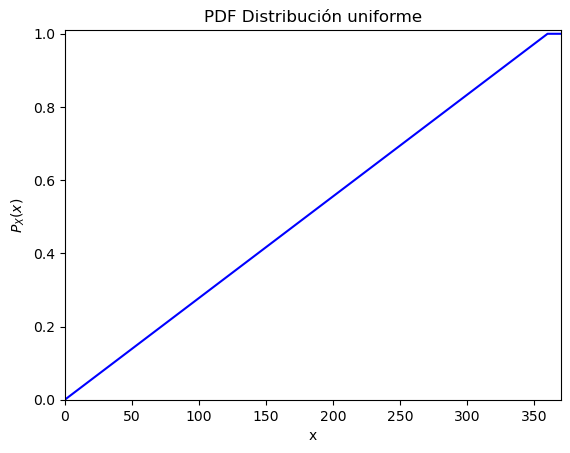

In [121]:
# Valores para graficar
x = np.arange(0,370,0.1) # Valores de x entre [0,370)
cdf_x = X.cdf(x)

# Grafica de la CDF
fig, ax = plt.subplots()
ax.set_xlim(0, 370)
ax.set_ylim(0, 1.01)
# Grafica del a PDF
plt.title('PDF Distribución uniforme')
plt.ylabel('$P_X(x)$')
plt.xlabel('x')
plt.plot(x, cdf_x,color='b')
plt.show()

* ¿Cuál es la probabilidad de que la imperfección se encuentre entre 90° y 180° de la línea de referencia?
  
  Nos piden $P(90 \leq X \leq 180) = ?$ lo cual en terminos de la probabilidad acumulativa es:

  $$ P(90 \leq X \leq 180) =  P(X \leq 180) - P(X \leq 90) = F(180) - F(90)$$

In [122]:
F_90 = X.cdf(90) 
F_180 = X.cdf(180)

P_90_180 = F_180 - F_90

print("P(90 < X < 180) = " + str(P_90_180))

P(90 < X < 180) = 0.25


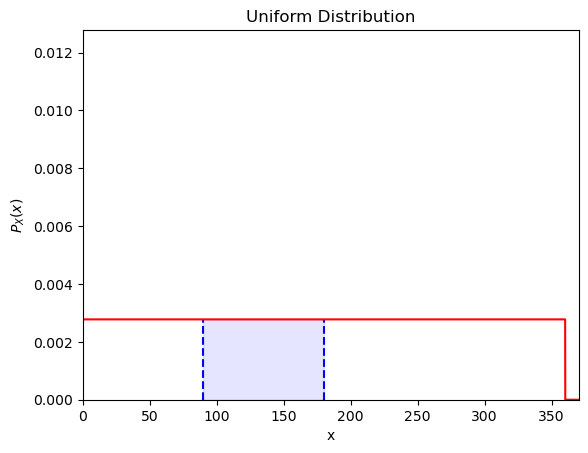

In [125]:
# Grafica
fig, ax = plt.subplots()
ax.set_xlim(0, 370)
ax.set_ylim(0, max(pdf_x) + 0.01)
# Limites
x_90 = plt.vlines(x = 90, ymin = 0,ymax = max(pdf_x), color = 'b', linestyles='--')
x_180 = plt.vlines(x = 180, ymin = 0,ymax = max(pdf_x), color = 'b', linestyles='--')
plt.title('Uniform Distribution')
plt.ylabel('$P_X(x)$')
plt.xlabel('x')
plt.plot(x, pdf_x,color='r')
ax.fill_between(x, pdf_x,0, where=(x>=90) & (x<=180), color='blue', alpha=.1)

plt.show()

* ¿Cuál es la probabilidad de que la imperfección a 90° de la línea de referencia?
  
  Aqui nos preguntan por: $P(0 \leq X \leq 90 | 270 \leq X \leq 360) = ?$

  $$ P((0 \leq X \leq 90)or(270 \leq X \leq 360)) = P(0 \leq X \leq 90) + P(270 \leq X \leq 360)$$

   $$ P((0 \leq X \leq 90)or(270 \leq X \leq 360)) = [P(X \leq 90) - P(X \leq 0)] + [P(X \leq 360) - P(X \leq 270)]$$

In [123]:
P_0_90 = X.cdf(90) - X.cdf(0)
P_270_360 = X.cdf(360) - X.cdf(270)
P_ref_90 = P_270_360 + P_0_90

print("P(0 < X < 90 | 270 < X < 360) = " + str(P_ref_90))

P(0 < X < 90 | 270 < X < 360) = 0.5


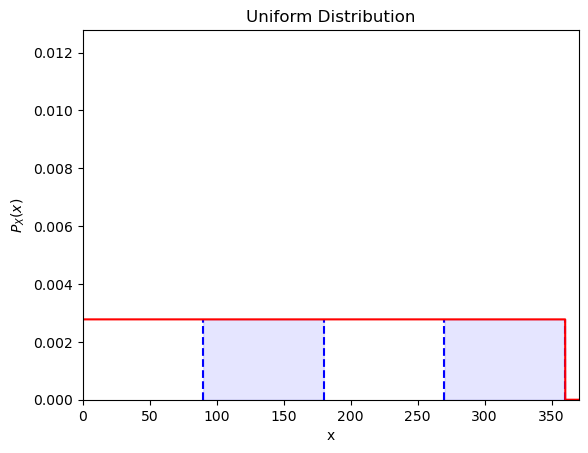

In [126]:
# Grafica
fig, ax = plt.subplots()
ax.set_xlim(0, 370)
ax.set_ylim(0, max(pdf_x) + 0.01)
# Limites
x_90 = plt.vlines(x = 90, ymin = 0,ymax = max(pdf_x), color = 'b', linestyles='--')
x_180 = plt.vlines(x = 180, ymin = 0,ymax = max(pdf_x), color = 'b', linestyles='--')
x_270 = plt.vlines(x = 270, ymin = 0,ymax = max(pdf_x), color = 'b', linestyles='--')
x_360 = plt.vlines(x = 360, ymin = 0,ymax = max(pdf_x), color = 'b', linestyles='--')
plt.title('Uniform Distribution')
plt.ylabel('$P_X(x)$')
plt.xlabel('x')
plt.plot(x, pdf_x,color='r')
ax.fill_between(x, pdf_x,0, where=(x>=90) & (x<=180), color='blue', alpha=.1)
ax.fill_between(x, pdf_x,0, where=(x>=270) & (x<=360), color='blue', alpha=.1)
plt.show()

## Ejemplo 4

Cuando un conductor se detiene en un semáforo en rojo en una determinada intersección, el tiempo de espera para que el semáforo cambie a verde, en segundos, se distribuye uniformemente en el intervalo (0, 30). 

Sea $X: \mathrm{el\;tiempo\;de\;espera\;para\;que\;el\;semáforo\;cambie de rojo a verde}$ tenemos que los parametros del problema son:
* $𝑎=0$
* $𝑏=30$
  
De modo que $𝑋 \sim 𝑈(0,30)$


In [127]:
# X ~ U(a = 0, b = 30)
a = 0
b = 30
X = stats.uniform(loc=a, scale=b)

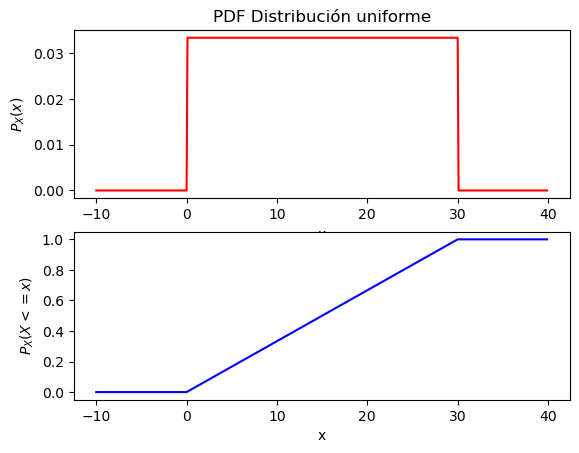

In [131]:

#plot 1: PDF

x = np.arange(-10,40,0.1) # Valores de x entre [0,370)
pdf_x = X.pdf(x)
plt.subplot(2, 1, 1)
plt.title('PDF Distribución uniforme')
plt.ylabel('$P_X(x)$')
plt.xlabel('x')
plt.plot(x, pdf_x,color='r')

#plot 2: CDF
cdf_x = X.cdf(x)
plt.subplot(2, 1, 2)
plt.ylabel('$P_X(X<=x)$')
plt.xlabel('x')
plt.plot(x, cdf_x,color='b')
plt.show()

1. Encuentre la probabilidad de que el tiempo de espera esté entre 10 y 15 segundos.

$$P(10 < X < 15) = P(X < 15) - P(X < 10) = F(15) - F(10)$$

In [135]:
F_15 = X.cdf(15) 
F_10 = X.cdf(10)

P_10_15 = F_15 - F_10

print("P(10 < X < 15) = " + str(P_10_15))

P(10 < X < 15) = 0.16666666666666669


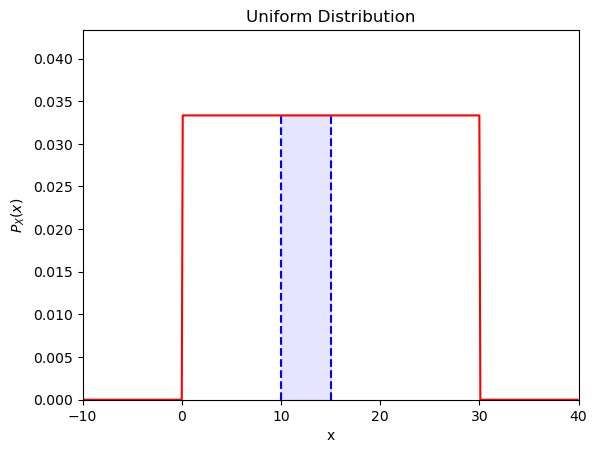

In [133]:
# Grafica
fig, ax = plt.subplots()
ax.set_xlim(-10, 40)
ax.set_ylim(0, max(pdf_x) + 0.01)
# Limites
x_10 = plt.vlines(x = 10, ymin = 0,ymax = max(pdf_x), color = 'b', linestyles='--')
x_15 = plt.vlines(x = 15, ymin = 0,ymax = max(pdf_x), color = 'b', linestyles='--')
plt.title('Uniform Distribution')
plt.ylabel('$P_X(x)$')
plt.xlabel('x')
plt.plot(x, pdf_x,color='r')
ax.fill_between(x, pdf_x,0, where=(x>=10) & (x<=15), color='blue', alpha=.1)

plt.show()

2. Encuentre la media y la desviación estándar.



## Referencias

1. https://realpython.com/python-histograms/
2. https://courses.lumenlearning.com/introstats1/chapter/the-uniform-distribution/
3. https://www.educative.io/answers/how-to-model-the-uniform-distribution-in-python
4. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html
5. https://www.kaggle.com/code/hamelg/python-for-data-22-probability-distributions
6. https://towardsdatascience.com/understanding-probability-distributions-using-python-9eca9c1d9d38
7. https://www.datacamp.com/tutorial/probability-distributions-python
8. https://notebook.community/iRipVanWinkle/ml/Data%20Science%20UA%20-%20September%202017/Lecture%2003%20-%20Basic%20Statistics/Overview_of_distributions
9. https://seaborn.pydata.org/tutorial/distributions.html
10. https://neuraldatascience.io/4-viz/seaborn.html
11. https://cu-psych-computing.github.io/cu-psych-comp-tutorial/tutorials/python/4-plotting/
12. https://deepnote.com/@a_mas/Curso-de-Visualizacion-de-Datos-con-Matplotlib-y-Seaborn-a5cbcd22-59a5-4f17-af14-92866ad80a76
13. https://www.tutorialspoint.com/how-to-fill-color-below-a-curve-in-matplotlib
14. https://stackoverflow.com/questions/10046262/how-to-shade-region-under-the-curve-in-matplotlib
15. https://stackoverflow.com/questions/46685453/how-to-fill-with-a-different-color-an-area-in-seaborn-distplot
16. https://proclusacademy.com/blog/area-under-density-curve-percentile/
17. https://stackoverflow.com/questions/51442329/use-fill-between-in-python-to-shade-a-sub-area-of-a-density-curve
18. https://www.geeksforgeeks.org/matplotlib-pyplot-fill_between-in-python/
19. https://livebook.manning.com/book/data-science-bookcamp/chapter-2/
20. https://stackoverflow.com/questions/46711019/color-the-shaded-area-under-the-curve-distribution-plot-different-colors
21. https://www.alphacodingskills.com/numpy/numpy-uniform-distribution.php